In [1]:
import os, sys
#from IPython.display import display
#from IPython.display import Image as _Imgdis
#from PIL import Image
import numpy as np
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import keras
from keras.layers import Dense,Dropout
from keras.layers import Conv2D,MaxPooling2D,Input,UpSampling2D
from keras.models import Model
from keras import activations
import tensorflow as tf
from keras import activations

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# preparation network

In [3]:
folder=r"/content/drive/My Drive/Imagenet3000"
folder2=r"/content/drive/My Drive/coco_3000"
#hf=r"/media/titanxpascal/ACER DATA/COMPRESSION/divanshu/cocoheatmaps_5500"
onlyfiles = [f1 for f1 in sorted(os.listdir(folder)) if os.path.isfile(os.path.join(folder, f1))]
onlyfiles2 = [f1 for f1 in sorted(os.listdir(folder2)) if os.path.isfile(os.path.join(folder2, f1))]
#onlyfiles1 = [f2 for f2 in sorted(os.listdir(hf)) if os.path.isfile(os.path.join(hf, f2))]
#onlyfiles1.sort()
onlyfiles.sort()
onlyfiles2.sort()
xdataset=np.ndarray(shape=(2000,224,224,3),dtype=np.float32)
xgradds=np.ndarray(shape=(2000,224,224,3),dtype=np.float32)
vxdataset=np.ndarray(shape=(200,224,224,3),dtype=np.float32)
vgradds=np.ndarray(shape=(200,224,224,3),dtype=np.float32)
xtestset=np.ndarray(shape=(100,224,224,3),dtype=np.float32)
tgradds=np.ndarray(shape=(100,224,224,3),dtype=np.float32)
for i in range(0,2300):
    if(i==1):
        print('pass')
    ft=folder + "/" + onlyfiles[i]
    ft1=folder2 + "/" + onlyfiles2[i]
    im0=load_img(ft,target_size=(224,224))
    im1=load_img(ft1,target_size=(224,224))
    x=img_to_array(im0)
    y=img_to_array(im1)
    y/=255.0
    x/=255.0 
    if(i<2000):
        xgradds[i]=y
        xdataset[i]=x
        if(i==0):
            print("suucess")   
    elif(i<2200):
        vgradds[i-2000]=y
        vxdataset[i-2000]=x
    else:
        tgradds[i-2200]=y
        xtestset[i-2200]=x
    print(i)
x=None
lab_image=None
im=None
onlyfiles=[]
print(xdataset.shape)

suucess
0
pass
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
2

In [0]:
import matplotlib.pyplot as plt
n = 4
plt.figure(figsize=(20, 20))
for i in range(0,n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(xtestset[i].reshape(224,224,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(tgradds[i].reshape(224,224,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
import matplotlib.pyplot as plt
n = 4
plt.figure(figsize=(20, 20))
for i in range(0,n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(outt[i].reshape(224,224,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(tgradds[i].reshape(224,224,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
outt[i]/=255

In [0]:
from PIL import Image
for i in range(0,1000):
     outt[i]*=255
     j = Image.fromarray(outt[i].astype(np.uint8))
     j.save(r"C:\Users\LENOVO\Desktop\hided\\"+"hide"+str(10000+i)+".j")


In [0]:
import matplotlib,cv2
for i in range(0,1000):
    
    in_loc = 'test_images'
    out_loc =r"C:\Users\LENOVO\Desktop\hided\\"+"hide"+str(10000+i)
    val_psnr = []
    val_ssim = []
    val = []
    
#     for im_loc in (os.listdir(in_loc)):
#         adr = in_loc + '/' + im_loc

    X = []
    img =outt[i]
    m, n = img.shape[0], img.shape[1]

    flag = 0
    if m%2!=0:
        flag = 1
        m = m - 1

    if n%2!=0:
        flag = 1
        n = n - 1

    img = cv2.resize(img, (m, n))

    X.append(img)
    X = np.array(X)
    X = X.astype('float32')
    #X = X / 255

    matplotlib.pyplot.imsave(out_loc+'.png', X[0], cmap = 'gray')
#         upto_comcnn = Model(model_comcnn.input, model_comcnn.layers[3].output)
#         Ycom = upto_comcnn.predict(X[:,:,:,:1])

#         Xcompress = compress_this(Ycom, 10)
#         Xcompress = Xcompress.astype('float32')
#         Xcompress = Xcompress / 255

#         Y = model_edsr.predict(Xcompress)
#         Y[Y>1] = 1
#         Z = copy.deepcopy(X)
#         Z[:,:,:,0] = Y[:,:,:,0]
# #         mpimg.imsave(out_loc+'/'+im_loc+'-out.png', ycbcr2rgb(Z[0]), cmap = 'gray')

In [0]:
folder=r"C:\Users\LENOVO\Desktop\hided"
#hf=r"/media/titanxpascal/ACER DATA/COMPRESSION/divanshu/cocoheatmaps_5500"
onlyfiles = [f1 for f1 in sorted(os.listdir(folder)) if os.path.isfile(os.path.join(folder, f1))]
onlyfiles2 = [f1 for f1 in sorted(os.listdir(folder2)) if os.path.isfile(os.path.join(folder2, f1))]
#onlyfiles1 = [f2 for f2 in sorted(os.listdir(hf)) if os.path.isfile(os.path.join(hf, f2))]
#onlyfiles1.sort()
onlyfiles.sort()
onlyfiles2.sort()
imagee=np.ndarray(shape=(1000,224,224,3),dtype=np.float32)
for i in range(0,1000):
    if(i==1):
        print('pass')
    ft=folder + "/" + onlyfiles[i]
    im0=load_img(ft,target_size=(224,224))
    x=img_to_array(im0)
    x/=255.0 
    if(i<1000):
        imagee[i]=x
        if(i==0):
            print("suucess")   
    print(i)
x=None
lab_image=None
im=None
onlyfiles=[]
print(xdataset.shape)

In [0]:
input2=Input(shape=(224,224,3))
x=Conv2D(128,(5,5),padding="same",activation='relu',strides=1)(input2)
x=Conv2D(64,(3,3),padding="same",activation='relu',strides=1)(x)
x=Conv2D(64,(3,3),padding="same",activation='relu',strides=1)(x)
x=Conv2D(32,(3,3),padding="same",activation='relu',strides=1)(x)
x=Conv2D(32,(3,3),padding="same",activation='relu',strides=1)(x)
x=Conv2D(10,(3,3),padding="same",activation='relu',strides=1)(x)
steg=Conv2D(3,(3,3),padding="same",activation='relu',strides=1)(x)
stegnalysis=Model([input2],steg)
stegnalysis.summary()






In [0]:
stegnalysis.compile(optimizer='adam',loss='mse')

In [0]:
history=stegnalysis.fit(imagee,xdataset,epochs=20,verbose=1,batch_size=5)


In [0]:
inputj1=Input(shape=(224,224,3))
inputj2=Input(shape=(224,224,3))
hiddden=hider([inputj1,inputj2])
revealed=stegnalysis(hidden)
jointmodel=Model([inputj1,inputj2],revealed)
jointmodel.compile(optimizer='adam',loss='mse')

In [0]:
history=jointmodel.fit([x1,x2],x1,epochs=20,verbose=1,batch_size=5)


In [4]:
inputj0=Input(shape=(224,224,3))#cover
inputj1=Input(shape=(224,224,3))#secret
combined=keras.layers.concatenate([inputj0,inputj1])
x=Conv2D(128,(5,5),padding="same",activation='relu',strides=1)(combined)
x=Conv2D(64,(3,3),padding="same",activation='relu',strides=1)(x)
x=Conv2D(32,(3,3),padding="same",activation='relu',strides=1)(x)
x=Conv2D(10,(3,3),padding="same",activation='relu',strides=1)(x)
hidden=Conv2D(3,(3,3),padding="same",activation='relu',strides=1)(x)


x=Conv2D(128,(5,5),padding="same",activation='relu',strides=1)(hidden)
x=Conv2D(64,(3,3),padding="same",activation='relu',strides=1)(x)
x=Conv2D(64,(3,3),padding="same",activation='relu',strides=1)(x)
x=Conv2D(32,(3,3),padding="same",activation='relu',strides=1)(x)
x=Conv2D(10,(3,3),padding="same",activation='relu',strides=1)(x)
x=Conv2D(10,(3,3),padding="same",activation='relu',strides=1)(x)
reveal=Conv2D(3,(3,3),padding="same",activation='relu',strides=1)(x)
joint_model=Model(inputs=[inputj0,inputj1],outputs=[hidden,reveal])
joint_model.summary()






Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 224, 224, 6)  0           input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 224, 224, 128 19328       concatenate_1[0][0]     

In [5]:
joint_model.compile(optimizer='adam',loss='mse')
history=joint_model.fit([xgradds,xdataset],[xgradds,xdataset],epochs=40,verbose=1,batch_size=5)





Epoch 1/40





2000/2000 [==============================] - 114s 57ms/step - loss: 0.0648 - conv2d_5_loss: 0.0298 - conv2d_12_loss: 0.0350
Epoch 2/40
2000/2000 [==============================] - 105s 53ms/step - loss: 0.0264 - conv2d_5_loss: 0.0110 - conv2d_12_loss: 0.0155
Epoch 3/40
2000/2000 [==============================] - 106s 53ms/step - loss: 0.0219 - conv2d_5_loss: 0.0089 - conv2d_12_loss: 0.0131
Epoch 4/40
2000/2000 [==============================] - 106s 53ms/step - loss: 0.0195 - conv2d_5_loss: 0.0080 - conv2d_12_loss: 0.0115
Epoch 5/40
2000/2000 [==============================] - 106s 53ms/step - loss: 0.0188 - conv2d_5_loss: 0.0076 - conv2d_12_loss: 0.0111
Epoch 6/40
2000/2000 [==============================] - 106s 53ms/step - loss: 0.0173 - conv2d_5_loss: 0.0068 - conv2d_12_loss: 0.0104
Epoch 7/40
2000/2000 [==============================] - 106s 53ms/step - loss: 0.0167 - conv2d_5_loss: 0.0062 - conv2d_12_loss: 0.0104
Epoch 8/40
2000/2000 [========================

In [0]:
joint_model.save("/content/drive/My Drive/stego.h5")

KeyError: ignored

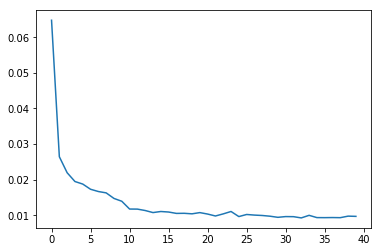

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [0]:
hide,reveal=joint_model.predict([tgradds,xtestset])

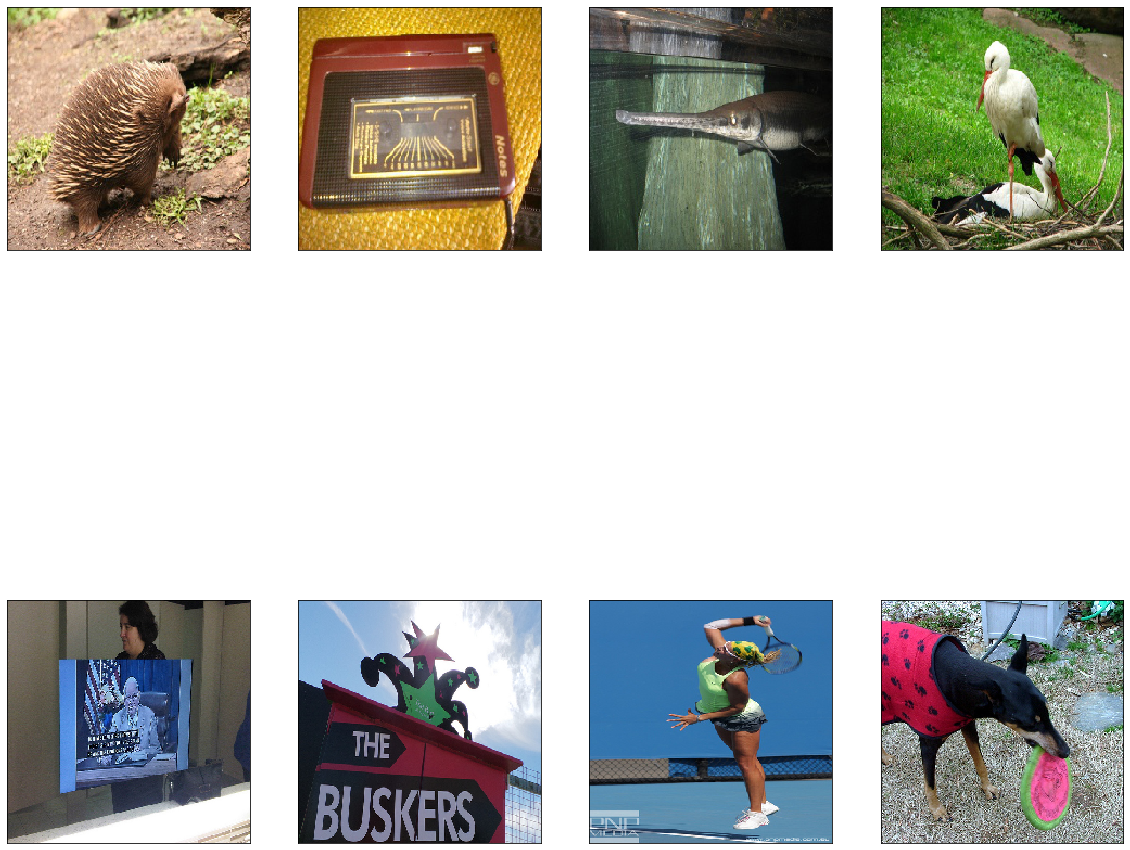

In [11]:
import matplotlib.pyplot as plt
n = 4
plt.figure(figsize=(20, 20))
for i in range(0,n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(xtestset[i].reshape(224,224,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(tgradds[i].reshape(224,224,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


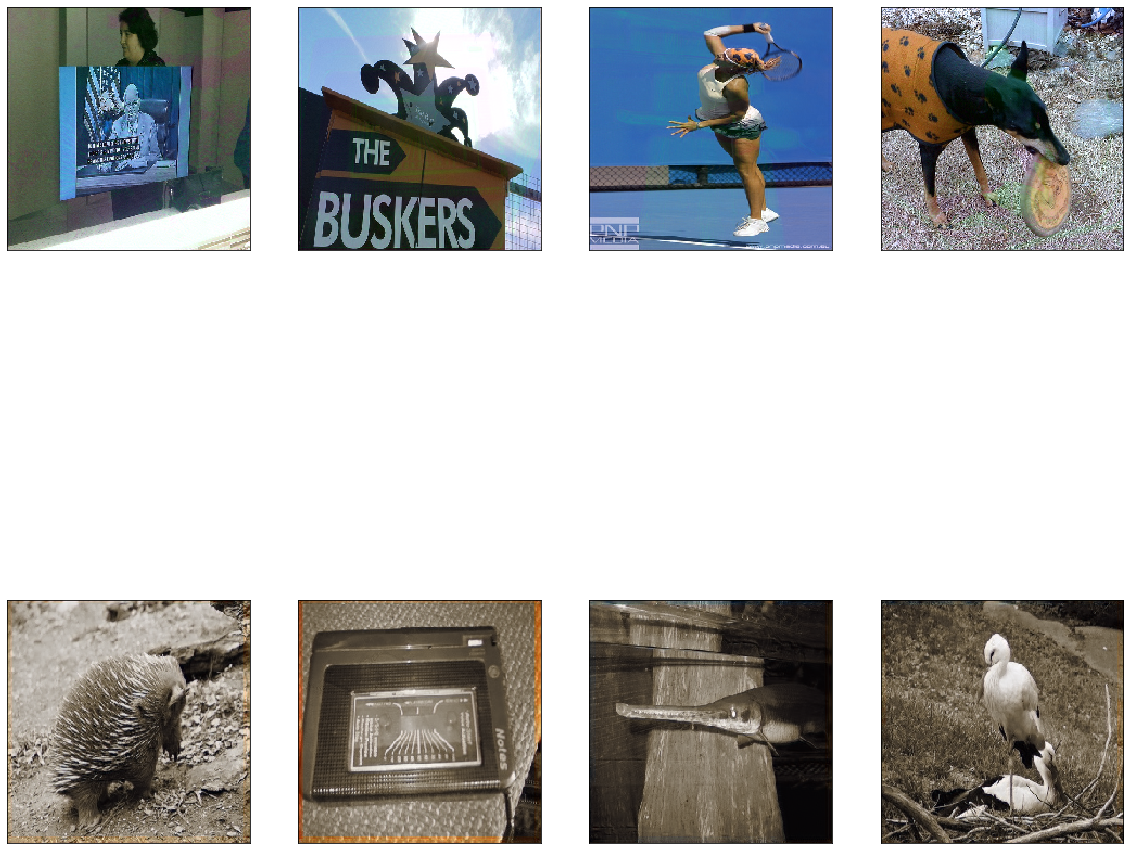

In [12]:
import matplotlib.pyplot as plt
n = 4
plt.figure(figsize=(20, 20))
for i in range(0,n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(hide[i].reshape(224,224,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(reveal[i].reshape(224,224,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()